# Data preprocessing methods: Normalization



    Notebook version:

    * 1.0 (Sep 15, 2020) - First version
    * 1.1 (Sep 15, 2021) - Exercises

    Authors: Jesús Cid Sueiro (jcid@ing.uc3m.es)

In [1]:
# Some libraries that will be used along the notebook.
import numpy as np
import matplotlib.pyplot as plt

## 1. Data preprocessing

## 1.1. The dataset.

A key component of any data processing method or any machine learning algorithm is the **dataset**, i.e., the set of data that will be the input to the method or algorithm. 

The dataset collects information extracted from a population (of objects, entities, individuals,...). For instance, we can measure the weight and height of students from a class and collect this information in a dataset ${\cal S} = \{{\bf x}_k, k=0, \ldots, K-1\}$ where $K$ is the number of students, and each sample is a 2 dimensional vector, ${\bf x}_k= (x_{k0}, x_{k1})$, with the height  and the weight in the first and the second component, respectively. These components are usually called **features**. In other datasets, the number of features can be arbitrarily large.

### 1.1. Data preprocessing

The aim of [data preprocessing methods](https://scikit-learn.org/stable/modules/preprocessing.html) is to transform the data into a form that is ready to apply machine learning algorithms. This may include:

  * [Data normalization](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling): transform the individual features to ensure a proper range of variation
  * [Data imputation](https://scikit-learn.org/stable/modules/impute.html): assign values to features that may be missed for some data samples
  * [Feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html): transform the original data to compute new features that are more appropiate for a specific prediction task
  * [Dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction): remove features that are not relevant for the prediction task.
  * [Outlier removal](https://scikit-learn.org/stable/modules/outlier_detection.html): remove samples that may contain errors and are not reliable for the prediction task.
  * [Clustering](https://scikit-learn.org/stable/modules/clustering.html): partition the data into smaller subsets, that could be easier to process.
  
In this notebook we will focus on data normalization.

## 2. Data normalization 

All samples in the dataset can be arranged by rows in a $K \times m$ **data matrix** ${\bf X}$, where $m$ is the number of features (i.e. the dimension of the vector space containing the data). Each one of the $m$ data features may represent variables of very different nature (e.g. time, distance, price, volume, pixel intensity,...). Thus, the scale and the range of variation of each feature can be completely different.

As an illustration, consider the 2-dimensional dataset in the figure

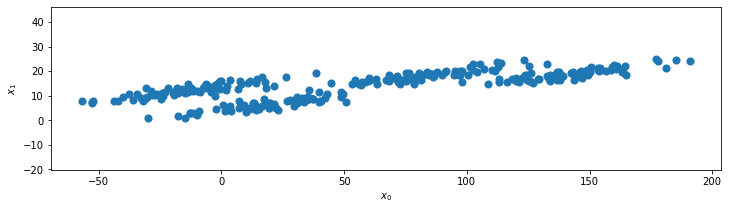

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
X = X @ np.array([[30, 4], [-8, 1]]) + np.array([90, 10])

plt.figure(figsize=(12, 3))
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.axis('equal')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()

We can see that the first data feature ($x_0$) has a much large range of variation than the second ($x_1$). In practice, this may be problematic: the convergence properties of some machine learning algorithms may depend critically on the feature distributions and, in general, features sets ranging over similar scales use to offer a better performance.

For this reason, transforming the data in order to get similar range of variations for all features is desirable. This can be done in several ways.

### 2.1. Standard scaling.

A common normalization method consists on applying an affine transformation
$$
{\bf t}_k = {\bf D}({\bf x}_k - {\bf m})
$$

where ${\bf D}$ is a diagonal matrix, in such a way that the transformed dataset ${\cal S}' = \{{\bf t}_k, k=0, \ldots, K-1\}$ has zero sample mean, i.e.,

$$
\frac{1}{K} \sum_{k=0}^{K-1} {\bf t}_k = 0
$$

and unit sample variance, i.e., 

$$
\frac{1}{K} \sum_{k=0}^{K-1} t_{ki}^2 = 1
$$

It is not difficult to verify that this can be done by taking ${\bf m}$ equal to the sample mean
$$
{\bf m} = \frac{1}{K} \sum_{k=0}^{K-1} {\bf x}_k
$$

and taking the diagonal components of ${\bf D}$ equal to the inverse of the standard deviation of each feature, i.e.,

$$
d_{ii} = \frac{1}{\sqrt{\frac{1}{K} \sum_{k=0}^{K-1} (x_{ki} - m_i)^2}}
$$

Using the data matrix ${\bf X}$ and the *broadcasting* property of the basic mathematical operators in Python, the implementation of this normalization is straightforward.

**Exercise 1**: Apply a standard scaling to the data matrix. To do so:

  1. Compute the mean, and store it in variable `m` (you can use method `mean` from `numpy`)
  2. Compute the standard deviation of each feature, and store the result in variable `s` (you can use method `std` from `numpy`)
  3. Take advangate of the broadcasting property to normalize the data matrix in a single line of code. Save the result in variable `T`.

In [3]:
# Compute the sample mean
# m = <FILL IN>
m = np.mean(X, axis=0)     # Compute the sample mean
print(f'The sample mean is m = {m}')

# Compute the standard deviation of each feature
# s = <FILL IN>
s = np.std(X, axis=0)      # Compute the standard deviation of each feature

# Normalize de data matrix
# T = <FILL IN>
T = (X-m)/s                # Normalize

The sample mean is m = [58.06760405 13.94251037]


We can test if the transformed features have zero-mean and unit variance:

In [4]:
# Testing mean
print(f"- The mean of the transformed features are: {np.mean(T, axis=0)}")
print(f"- The standard deviation of the transformed features are: {np.std(T, axis=0)}")

- The mean of the transformed features are: [ 5.81016716e-16 -6.03961325e-16]
- The standard deviation of the transformed features are: [1. 1.]


(note that the results can deviate from 0 or 1 due to finite precision errors)

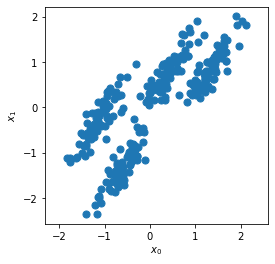

In [5]:
# Now you can verify if your solution satisfies
plt.figure(figsize=(4, 4))
plt.scatter(T[:, 0], T[:, 1], s=50);
plt.axis('equal')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()

#### 2.1.1. Implementation in `sklearn`

The `sklearn` package contains a method to perform the standard scaling over a given data matrix.


The sample mean is m = [58.06760405 13.94251037]


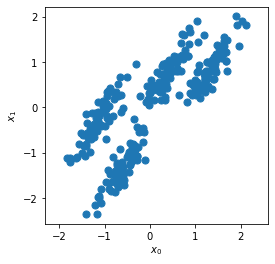

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
print(f'The sample mean is m = {scaler.mean_}')

T2 = scaler.transform(X)
plt.figure(figsize=(4, 4))
plt.scatter(T2[:, 0], T2[:, 1], s=50);
plt.axis('equal')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()

Note that, once we have defined the scaler object in Python, you can apply the scaling transformation to other datasets. This will be useful in further topics, when the dataset may be split in several matrices and we may be interested in defining the transformation using some matrix, and apply it to others

### 2.2. Other normalizations.

The are some alternatives to the standard scaling that may be interesting for some datasets. Here we show some of them, available at the [preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module in `sklearn`:

  * [preprocessing.MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler): Scale each feature by its maximum absolute value. As a result, all feature values will lie in the interval [-1, 1].
  * [preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler): Transform features by scaling each feature to a given range. Also, all feature values will lie in the specified interval.
  * [preprocessing.Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer): Normalize samples individually to unit norm. That is, it applies the transformation ${\bf t}_k = \frac{1}{\|{\bf x}_k\|} {\bf x}_k$
  * [preprocessing.PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer): Apply a power transform featurewise to make data more Gaussian-like.
  * [preprocessing.QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer): Transform features using quantile information. The transformed features follow a specific target distribution (uniform or normal). 
  * [preprocessing.RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler): Scale features using statistics that are robust to outliers. This way, anomalous values in one or very few samples cannot have a strong influence in the normalization.

You can find more detailed explanation of these transformations `sklearn` [documentation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing).
 

**Exercise 2**: Use `sklearn` to transform the data matrix `X` into a matrix `T24`such that the minimum feature value is 2 and the maximum is 4.

(Hint: select and import the appropriate preprocessing module from `sklearn` an follow the same steps used in the code cell above for the scandard scaler)

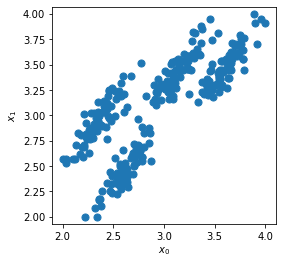

In [7]:
# Write your solution here
# <SOL>
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(2, 4))
scaler.fit(X)
T24 = scaler.transform(X)
# </SOL>

# We can visually check that the transformed data features lie in the selected range.
plt.figure(figsize=(4, 4))
plt.scatter(T24[:, 0], T24[:, 1], s=50);
plt.axis('equal')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()